In [1]:
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1
import os
import sys
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

import matplotlib.pyplot as plt
%matplotlib inline
from dotenv import load_dotenv
%aimport settings
import settings
import pandas as pd
import numpy as np

maxsize=3000
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 352905

import statsmodels.api as sm
from tqdm import trange
from tqdm import tqdm
import warnings
import math
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [3]:
sales=pd.read_csv(settings.raw_data+'/sales_train.csv')
item_cat=pd.read_csv(settings.raw_data+"/item_categories.csv")
item=pd.read_csv(settings.raw_data+"/items.csv")
sub=pd.read_csv(settings.raw_data+"/sample_submission.csv")
shops=pd.read_csv(settings.raw_data+"/shops.csv")
test=pd.read_csv(settings.raw_data+"/test.csv")

#### EDA

In [6]:
sales_item_price = sales[['item_id','shop_id','date_block_num','item_price']].drop_duplicates(keep = 'first')

In [7]:
sales[(sales['item_id']==22154) & (sales['shop_id']==58) ]#.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
403711,2013-04-15,3,58,22154,999.0,1.0
738802,2013-08-08,7,58,22154,999.0,1.0
2845288,2015-02-09,32,58,22154,299.0,1.0


In [38]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [39]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [40]:
item_cat.item_category_name.unique()

array(['PC - Гарнитуры/Наушники', 'Аксессуары - PS2', 'Аксессуары - PS3',
       'Аксессуары - PS4', 'Аксессуары - PSP', 'Аксессуары - PSVita',
       'Аксессуары - XBOX 360', 'Аксессуары - XBOX ONE', 'Билеты (Цифра)',
       'Доставка товара', 'Игровые консоли - PS2',
       'Игровые консоли - PS3', 'Игровые консоли - PS4',
       'Игровые консоли - PSP', 'Игровые консоли - PSVita',
       'Игровые консоли - XBOX 360', 'Игровые консоли - XBOX ONE',
       'Игровые консоли - Прочие', 'Игры - PS2', 'Игры - PS3',
       'Игры - PS4', 'Игры - PSP', 'Игры - PSVita', 'Игры - XBOX 360',
       'Игры - XBOX ONE', 'Игры - Аксессуары для игр',
       'Игры Android - Цифра', 'Игры MAC - Цифра',
       'Игры PC - Дополнительные издания',
       'Игры PC - Коллекционные издания', 'Игры PC - Стандартные издания',
       'Игры PC - Цифра', 'Карты оплаты (Кино, Музыка, Игры)',
       'Карты оплаты - Live!', 'Карты оплаты - Live! (Цифра)',
       'Карты оплаты - PSN', 'Карты оплаты - Windows (Цифра)',

In [41]:
item_cat[item_cat.item_category_name.str.contains('PS')]

,item_category_name,item_category_id
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
10,Игровые консоли - PS2,10
11,Игровые консоли - PS3,11
12,Игровые консоли - PS4,12
13,Игровые консоли - PSP,13
14,Игровые консоли - PSVita,14


In [56]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [55]:
item.item_category_id.value_counts()

40    5035
55    2365
37    1780
31    1125
58     790
30     756
72     666
19     628
61     598
23     501
43     471
57     427
56     397
67     394
63     366
76     333
41     332
69     317
38     310
62     295
59     294
64     290
78     278
75     277
28     240
70     228
77     220
45     195
66     178
20     175
49     167
65     163
44     161
47     151
25     140
21     125
24     123
54      90
22      79
2       75
60      52
29      46
11      41
6       40
15      37
73      36
3       34
5       29
68      27
7       24
12      20
16      20
33      18
14      18
4       15
83      15
42      12
9       12
46      12
8        9
82       8
34       8
27       8
74       8
17       7
81       7
39       7
71       6
36       6
32       6
80       6
18       6
13       6
48       5
0        4
35       4
52       3
53       3
26       3
50       2
1        2
51       1
10       1
79       1
Name: item_category_id, dtype: int64

### merge dataframe

In [4]:
pd.options.display.max_rows = 999
sales['date'] = pd.to_datetime(sales['date'], format='%Y-%m-%d',infer_datetime_format=True)
sales_items = sales[['item_id','item_price']].drop_duplicates(keep='first')

In [29]:
sales_shop = pd.merge(sales, shops, on='shop_id', how='left')
df_train = pd.merge(sales_shop, pd.merge(item, item_cat, on='item_category_id', how='left'), on='item_id', how='left')

In [30]:
df_train.item_cnt_day.describe()
#sns.distplot(df_train_agg.item_cnt_day)

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

In [9]:
df_train = df_train[(df_train['item_cnt_day']>0) & (df_train['item_cnt_day']<df_train['item_cnt_day'].max())].copy()
df_train.sort_values(['date','shop_id','item_id'], inplace = True)

In [ ]:
##Aggregate item count at monthly level
df_agg = df_train.groupby(['shop_id','item_id','date_block_num'])['item_cnt_day'].sum().rename(columns={'item_cnt_day':'item_cnt_month'}).reset_index(drop = False)

In [11]:
##Aggregate item count at monthly level
features = ['item_price']
col = 'item_cnt_day'
df_agg = df_train.groupby(['shop_id','item_id','date_block_num'])['item_cnt_day'].sum().rename(columns={'item_cnt_day':'item_cnt_month'}).reset_index(drop = False)
df_train_agg = pd.merge(df_agg, pd.merge(item, item_cat, on='item_category_id', how='left'), on='item_id', how='left')

for s in range(1, 5):
    df_train_agg["prev_shop{}_{}".format(col, s)] = df_train_agg.groupby(['date_block_num','shop_id','item_category_name'])[col].shift(s)
    features.append("prev_shop{}_{}".format(col, s))
df_train_agg.fillna(0, inplace = True)

### Outliers

In [12]:
df_train_agg = df_train_agg[df_train_agg['item_cnt_day']!=df_train_agg.item_cnt_day.max()].copy()##don't include outliers

In [13]:
df_train_agg.item_cnt_day.describe()
#sns.distplot(df_train_agg.item_cnt_day)

count    1.608224e+06
mean     2.269765e+00
std      8.269277e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.305000e+03
Name: item_cnt_day, dtype: float64

In [12]:
features

['item_price',
 'prev_shopitem_cnt_day_1',
 'prev_shopitem_cnt_day_2',
 'prev_shopitem_cnt_day_3',
 'prev_shopitem_cnt_day_4']

In [14]:
df_train_agg.head()

,shop_id,item_id,date_block_num,item_cnt_day,item_name,item_category_id,item_category_name,prev_shopitem_cnt_day_1,prev_shopitem_cnt_day_2,prev_shopitem_cnt_day_3,prev_shopitem_cnt_day_4
0,0,30,1,31.0,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,Кино - DVD,0.0,0.0,0.0,0.0
1,0,31,1,11.0,007: КООРДИНАТЫ «СКАЙФОЛЛ» (BD),37,Кино - Blu-Ray,0.0,0.0,0.0,0.0
2,0,32,0,6.0,1+1,40,Кино - DVD,0.0,0.0,0.0,0.0
3,0,32,1,10.0,1+1,40,Кино - DVD,31.0,0.0,0.0,0.0
4,0,33,0,3.0,1+1 (BD),37,Кино - Blu-Ray,0.0,0.0,0.0,0.0


In [20]:
df_train_agg.head()

,shop_id,item_id,date_block_num,item_cnt_day,item_name,item_category_id,item_category_name,prev_shopitem_cnt_day_1,prev_shopitem_cnt_day_2,prev_shopitem_cnt_day_3,prev_shopitem_cnt_day_4
0,0,30,1,31.0,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,Кино - DVD,0.0,0.0,0.0,0.0
1,0,31,1,11.0,007: КООРДИНАТЫ «СКАЙФОЛЛ» (BD),37,Кино - Blu-Ray,0.0,0.0,0.0,0.0
2,0,32,0,6.0,1+1,40,Кино - DVD,0.0,0.0,0.0,0.0
3,0,32,1,10.0,1+1,40,Кино - DVD,31.0,0.0,0.0,0.0
4,0,33,0,3.0,1+1 (BD),37,Кино - Blu-Ray,0.0,0.0,0.0,0.0


In [26]:
train = pd.merge(df_train_agg,sales_item_price[['item_id','shop_id','date_block_num','item_price']], on=['item_id','shop_id','date_block_num'],how='left')

In [27]:
train.shape

(1738117, 12)

In [23]:
train.drop_duplicates(keep='first', inplace=True)

In [24]:
train.shape

(15203987, 13)

In [28]:
df_train_agg.shape

(1608224, 11)

In [20]:
sales.shape

(2935849, 6)

In [26]:
train.shape

(27557506, 12)

In [18]:
train = train[train['item_price']!=train['item_price'].max()]

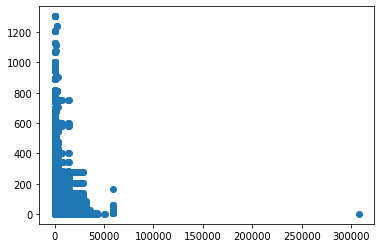

In [60]:
plt.scatter(x = train.item_price, y = train.item_cnt_day)

In [22]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [24]:
train.item_name.nunique()

21804

In [32]:
df_train.shop_name.unique()

array(['Адыгея ТЦ "Мега"', 'Воронеж ТРЦ "Максимир"',
       'Воронеж ТРЦ Сити-Парк "Град"', 'Казань ТЦ "Бехетле"',
       'Казань ТЦ "ПаркХаус" II', 'Калуга ТРЦ "XXI век"',
       'Красноярск ТЦ "Июнь"', 'Курск ТЦ "Пушкинский"',
       'Москва ТЦ "МЕГА Белая Дача II"',
       'Москва ТЦ "МЕГА Теплый Стан" II', 'Новосибирск ТЦ "Мега"',
       'Омск ТЦ "Мега"', 'РостовНаДону ТЦ "Мега"',
       'СПб ТК "Невский Центр"', 'Сергиев Посад ТЦ "7Я"',
       'Тюмень ТЦ "Зеленый Берег"', 'Химки ТЦ "Мега"',
       '!Якутск Орджоникидзе, 56 фран', '!Якутск ТЦ "Центральный" фран',
       'Балашиха ТРК "Октябрь-Киномир"', 'Волжский ТЦ "Волга Молл"',
       'Воронеж (Плехановская, 13)', 'Жуковский ул. Чкалова 39м?',
       'Интернет-магазин ЧС', 'Коломна ТЦ "Рио"',
       'Москва МТРЦ "Афи Молл"', 'Москва Магазин С21',
       'Москва ТК "Буденовский" (пав.А2)',
       'Москва ТК "Буденовский" (пав.К7)', 'Москва ТРК "Атриум"',
       'Москва ТЦ "Ареал" (Беляево)',
       'Москва ТЦ "Новый век" (Новокос

In [21]:
train.head()

,shop_id,item_id,date_block_num,item_cnt_day,item_name,item_category_id,item_category_name,prev_shopitem_cnt_day_1,prev_shopitem_cnt_day_2,prev_shopitem_cnt_day_3,prev_shopitem_cnt_day_4,item_price
0,0,30,1,31.0,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,Кино - DVD,0.0,0.0,0.0,0.0,399.000000
1,0,30,1,31.0,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,Кино - DVD,0.0,0.0,0.0,0.0,385.666667
2,0,30,1,31.0,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,Кино - DVD,0.0,0.0,0.0,0.0,265.000000
3,0,30,1,31.0,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,Кино - DVD,0.0,0.0,0.0,0.0,387.571429
4,0,30,1,31.0,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,Кино - DVD,0.0,0.0,0.0,0.0,391.000000


In [15]:
X_train, X_test, y_train, y_test = train_test_split(train[features], train['item_cnt_day'], test_size=0.30, random_state=42)

In [ ]:
tree = DecisionTreeClassifier(random_state = 42)
rf_p_dist={'splitter' : ['best','random'],
            'max_depth':[5,7, 10,None],
              'max_features':[4, 8, 20, None],
               'criterion':['gini','entropy'],
               'min_samples_leaf':randint(1,12),
               'min_samples_split':[8, 15, 25]
              }
clf = RandomizedSearchCV(tree, rf_p_dist, random_state=0)
search = clf.fit(X_train,y_train)
search.best_params_

In [22]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def Grid_Search_CV(X_train, y_train):

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"  : [100,200,300, 500],
            "max_features"  : ["auto", "sqrt", "log2"],
            #"max_features" : [20, 30, 40],
            "max_depth"     : [3, 4, 6, None],
           'min_samples_leaf':[5, 8, 12],
           'min_samples_split':[8, 15, 25],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def create_random_forest(train, test, train_labels, test_labels, best_params):
    rf = RandomForestRegressor(n_jobs=-1, random_state =50).set_params(**best_params)
    rf.fit(train,train_labels)
    pred = rf. predict(test)
    pred_train = rf. predict(train)
    
    x=np.median(train_labels)
    medianpredict1 = [x for _ in test_labels] 
    
    print('rmse baseline: ',rmse(medianpredict1, test_labels))
    print('MAE baseline: ',mean_absolute_error(test_labels,medianpredict1))
    print("rmse_test",rmse(pred, test_labels))
    print("MAE test", mean_absolute_error(test_labels, pred))
    print('rmse train', rmse(pred_train, train_labels))
    print('MAE train', mean_absolute_error(train_labels, pred_train))
    #tree_graph = tree.export_graphviz(rf, out_file=None, feature_names=features)
    return pred, pred_train, rf